<a href="https://colab.research.google.com/github/sarimadev/DataGlacierProjects/blob/workspace/G2M_insight_for_Cab_Investment_firm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBLEM DEFINITION**

**Derive actionable insights to inform XYZ's investment decision in the cab industry.**

### **DATA DESCRIPTION:** In the section below we would load and inspect each data set to understand its structure and content

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Load datasets
cab_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Cab_Data.csv')
customer_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Customer_ID.csv')
transaction_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Transaction_ID.csv')
city_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/City.csv')

**Inspect each dataset structure**

In [3]:
print(cab_data.shape) #display number of rows & columns
cab_data.head() #display the first 5 rows

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
print(customer_data.shape) #display number of rows & columns
customer_data.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
print(transaction_data.shape) #display number of rows & columns
transaction_data.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
print(city_data.shape) #display number of rows & columns
city_data.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


**Inspect the field names, their data types and summary statistics**

In [7]:
# Display information about each dataset
print("Cab Data Info:")
print(cab_data.info())
print("\nCustomer Data Info:")
print(customer_data.info())
print("\nTransaction Data Info:")
print(transaction_data.info())
print("\nCity Data Info:")
print(city_data.info())

Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month) 

After conducting the initial inspection of the data sets, we found that each data set is relatively clean with no missing values, which is advantageous for our analysis. The 'Cab_Data' set contains 359,392 entries detailing transactions, including the distance traveled and costs, with appropriate data types for numerical analysis. The 'Customer_Data' contains demographic information for 49,171 unique customers, including their gender, age, and income. The 'Transaction_Data' provides 440,098 entries for customers who made multiple transactions. The 'City_Data', although much smaller with only 20 entries, lists cities, their populations, and the number of cab users, which will be crucial for geographic and market penetration analysis. It is noteworthy that 'City_Data' has all its columns as object types, suggesting potential preprocessing steps to convert population and users into numerical types. This clean and detailed data provides a strong foundation for our exploratory data analysis and subsequent insights.

In [8]:
# Display summary statistics for each dataset
print("Cab Data Summary:")
print(cab_data.describe())
print("\nCustomer Data Summary:")
print(customer_data.describe())
print("\nTransaction Data Summary:")
print(transaction_data.describe())
print("\nCity Data Summary:")
print(city_data.describe())

Cab Data Summary:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  

Customer Data Summary:
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mea

The Cab_Data contains 359,392 transactions, with an average trip distance of 22.57 km (ranging from 1.9 to 48 km) and an average price of $423.44 (± $274.38). The Customer_Data includes 49,171 unique customers, with an average age of 35.36 years (ranging from 18 to 65) and an average monthly income of $15,015.63 (± $8,002.21). The Transaction_Data encompasses 440,098 entries, mapping transactions (IDs: 10,000,001 to 10,440,110) to customers (IDs: 1 to 60,000), with an average customer ID of 23,619.51. The City_Data consists of 20 unique cities, with New York City having the highest population and cab users. These datasets, when integrated, can inform XYZ's investment decision by offering a comprehensive understanding of the cab industry's customer diversity, transaction patterns, and geographic distribution.

### **DATA CLEANING & PREPARATION:** In the section below we would clean and prepare the datasets for further analysis by handling missing and duplicate values, transforming feature data types and checking for outliers/anomalies.

In [9]:
# Check for missing values
print("Missing Values in Cab Data:")
print(cab_data.isnull().sum())
print("\nMissing Values in Customer Data:")
print(customer_data.isnull().sum())
print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum())
print("\nMissing Values in City Data:")
print(city_data.isnull().sum())

Missing Values in Cab Data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Missing Values in Customer Data:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Missing Values in Transaction Data:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Missing Values in City Data:
City          0
Population    0
Users         0
dtype: int64


In [10]:
# Check for duplicates in Cab Data
duplicates_cab_data = cab_data.duplicated()
print("Number of duplicate rows in Cab Data:", duplicates_cab_data.sum())

# Display the duplicate rows, if any
print("Duplicate rows in Cab Data:")
print(cab_data[duplicates_cab_data])


Number of duplicate rows in Cab Data: 0
Duplicate rows in Cab Data:
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []


In [11]:
# Check for duplicates in Customer Data
duplicates_customer_data = customer_data.duplicated()
print("Number of duplicate rows in Customer Data:", duplicates_customer_data.sum())

# Display the duplicate rows, if any
print("Duplicate rows in Customer Data:")
print(customer_data[duplicates_customer_data])


Number of duplicate rows in Customer Data: 0
Duplicate rows in Customer Data:
Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month)]
Index: []


In [12]:
# Check for duplicates in Transaction Data
duplicates_transaction_data = transaction_data.duplicated()
print("Number of duplicate rows in Transaction Data:", duplicates_transaction_data.sum())

# Display the duplicate rows, if any
print("Duplicate rows in Transaction Data:")
print(transaction_data[duplicates_transaction_data])


Number of duplicate rows in Transaction Data: 0
Duplicate rows in Transaction Data:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode]
Index: []


In [13]:
# Check for duplicates in City Data
duplicates_city_data = city_data.duplicated()
print("Number of duplicate rows in City Data:", duplicates_city_data.sum())

# Display the duplicate rows, if any
print("Duplicate rows in City Data:")
print(city_data[duplicates_city_data])


Number of duplicate rows in City Data: 0
Duplicate rows in City Data:
Empty DataFrame
Columns: [City, Population, Users]
Index: []


So far there are no missing or duplicate values. Next we Convert necessary columns to appropriate data types

In [14]:
#Convert date columns to datetime

from datetime import datetime, timedelta

#Function to convert Excel serial date to datetime
def excel_date_to_datetime(excel_date):
    return datetime(1899, 12, 30) + timedelta(days=excel_date)

# Apply the conversion if the data is in Excel serial date format
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(pd.to_numeric, errors='coerce')
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_date_to_datetime)



In [15]:
# Remove commas from Population and Users columns in the city_data
city_data['Population'] = city_data['Population'].str.replace(',', '')
city_data['Users'] = city_data['Users'].str.replace(',', '')

# Convert Population and Users columns to numeric
city_data['Population'] = pd.to_numeric(city_data['Population'])
city_data['Users'] = pd.to_numeric(city_data['Users'])

In [16]:
#verify transformations
print("Cab data after tranformation: ")
print(cab_data.info())
print(cab_data.head())

print("/nCity data after conversion:")
print(city_data.info())
print(city_data.head())

Cab data after tranformation: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3      

From the results above the transformations have been successfully carried out

**To support our analysis we are going to integrate a new dataset, the US Holiday dataset below**

In [17]:
#Load US Holiday dataset
holiday_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/US Holiday Dates (2004-2021).csv')

In [18]:
#Display the first few rows
print("Holiday Data:")
holiday_data.head()

Holiday Data:


,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


Let's view the structure of the dataset

In [19]:
print('Holiday Data: ')
print(holiday_data.info())

Holiday Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB
None


From the observation above, we need to perform datatype transformation and filter for the relevant fields needed to support the analysis

We need to convert timestamps to dates, filter for the relevant period (2016-2018) and drop irrelevant fields

In [20]:
# Convert the Date field in holiday data to datetime
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])

# Filter the holiday data for the relevant period (2016-2018)
holiday_data = holiday_data[(holiday_data['Date'] >= pd.to_datetime('2016-01-01')) &
                            (holiday_data['Date'] <= pd.to_datetime('2018-12-31'))]


In [21]:
#Drop irrelevant fields from the holiday dataset
columns_to_drop2 = ['WeekDay', 'Month', 'Day', 'Year']

holiday_data = holiday_data.drop(columns= columns_to_drop2)


In [22]:
# Display the first few rows of the filtered holiday data
print("Filtered Holiday Data:")
holiday_data.head()

Filtered Holiday Data:


,Date,Holiday
12,2016-07-04,4th of July
13,2017-07-04,4th of July
14,2018-07-04,4th of July
30,2016-12-25,Christmas Day
31,2017-12-25,Christmas Day


Let's clean the filtered datasets

In [23]:
#Display shape of dataset
print(holiday_data.shape)

(57, 2)


In [24]:
# Check for missing values
print("Missing Values in Holiday Data:")
print(holiday_data.isnull().sum())

Missing Values in Holiday Data:
Date       0
Holiday    0
dtype: int64


In [25]:
# Check for duplicates in Weather & Holiday Data
duplicates_holiday_data = holiday_data.duplicated()

print("Number of duplicate rows in Holiday Data:", duplicates_holiday_data.sum())

# Display the duplicate rows, if any
print("rows in Holiday Data:")
print(holiday_data[duplicates_holiday_data])

Number of duplicate rows in Holiday Data: 0
rows in Holiday Data:
Empty DataFrame
Columns: [Date, Holiday]
Index: []


In [26]:
# Display information about each dataset
print("Cab Data Info:")
print(cab_data.info())
print("\nCustomer Data Info:")
print(customer_data.info())
print("\nTransaction Data Info:")
print(transaction_data.info())
print("\nCity Data Info:")
print(city_data.info())
print("\nHoliday Data Info:")
print(holiday_data.info())

Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-nul

All the datasets are cleaned and transformed. Let's proceed with creating the master dataset by identifying relationships and merging accordingly.

Possible key joins:
* Cab Data with Transaction Data: Joined on Transaction ID.
* Result with Customer Data: Joined on Customer ID.
* Result with City Data: Joined on City.
* Result with Holiday Data: Joined on Date.


In [27]:
# Join Cab Data with Transaction Data
cab_transaction_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')

# Join the above with Customer Data
cab_transaction_customer_data = pd.merge(cab_transaction_data, customer_data, on='Customer ID', how='left')

# Join the result with City Data
cab_transaction_customer_city_data = pd.merge(cab_transaction_customer_data, city_data, on='City', how='left')

# Finally, join the result with Holiday Data
final_master_data = pd.merge(cab_transaction_customer_city_data, holiday_data, left_on='Date of Travel', right_on='Date', how='left')

# Drop the redundant 'Date' column from the merges
final_data = final_master_data.drop(columns=['Date'])

# Display the first few rows of the final master dataset
print("Final Master Data:")
final_data.head()

Final Master Data:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,NaN


In [28]:
#Display structure of final master dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359854 entries, 0 to 359853
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359854 non-null  int64         
 1   Date of Travel      359854 non-null  datetime64[ns]
 2   Company             359854 non-null  object        
 3   City                359854 non-null  object        
 4   KM Travelled        359854 non-null  float64       
 5   Price Charged       359854 non-null  float64       
 6   Cost of Trip        359854 non-null  float64       
 7   Customer ID         359854 non-null  int64         
 8   Payment_Mode        359854 non-null  object        
 9   Gender              359854 non-null  object        
 10  Age                 359854 non-null  int64         
 11  Income (USD/Month)  359854 non-null  int64         
 12  Population          359854 non-null  int64         
 13  Users               359854 no

From the viewing the structure of the final data, we can see that there are null values in the 'Holiday' column. We would rename those rows and sort the 'Date of Travel' column in ascender order for some sense of orderliness in the data

In [29]:
# Replace NaN values in the 'Holiday' column with 'None'
final_data['Holiday'].fillna('None', inplace=True)

# Sort the data by 'Date of Travel' in ascending order
final_data.sort_values(by='Date of Travel', ascending=True, inplace=True)

# Display the first few rows of the updated DataFrame
print("Updated Final Master Data:")
final_data.head()

Updated Final Master Data:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Holiday
409,10000560,2016-01-02,Yellow Cab,CHICAGO IL,18.08,406.95,221.2992,4021,Card,Male,35,30186,1955130,164468,None
317,10000468,2016-01-02,Yellow Cab,CHICAGO IL,27.30,583.42,383.2920,4269,Cash,Male,61,19370,1955130,164468,None
499,10000650,2016-01-02,Yellow Cab,CHICAGO IL,40.66,1005.24,522.0744,3778,Card,Male,31,12755,1955130,164468,None
761,10000912,2016-01-02,Yellow Cab,NEW YORK NY,13.86,407.20,174.6360,2731,Cash,Male,20,22350,8405837,302149,None
922,10001232,2016-01-02,Yellow Cab,SEATTLE WA,16.24,540.27,210.4704,37393,Card,Male,18,22205,671238,25063,None


In [30]:
#final_data.to_csv('xyz_master_data.csv')

## **EXPLORATORY DATA ANALYSIS:**

The analysis would be streamlined to focus on deriving insights that directly support the goal of identifying which cab company is performing better and is a better investment opportunity for XYZ. Such Insights include:

* Company Performance Metrics
* Revenue & Cost Analysis
* Customer & Geographical Demographics
* Impact of holidays

In [31]:
# Summary Statistics by Company
performance_metrics = final_data.groupby('Company').agg({
    'Price Charged': ['mean', 'std', 'sum'],
    'Cost of Trip': ['mean', 'std', 'sum'],
    'KM Travelled': ['mean', 'std', 'sum']
})
performance_metrics.columns = ['Avg Price Charged', 'Std Price Charged', 'Total Revenue', 'Avg Cost of Trip', 'Std Cost of Trip', 'Total Cost', 'Avg KM Travelled', 'Std KM Travelled', 'Total KM Travelled']
print("Company Performance Metrics:")
performance_metrics

Company Performance Metrics:


,Avg Price Charged,Std Price Charged,Total Revenue,Avg Cost of Trip,Std Cost of Trip,Total Cost,Avg KM Travelled,Std KM Travelled,Total KM Travelled
Company,,,,,,,,,
Pink Cab,310.775134,181.984835,2.634907e+07,248.136757,135.399263,2.103827e+07,22.558640,12.230707,1912634.31
Yellow Cab,458.268567,288.461988,1.260555e+08,297.928358,162.541199,8.195086e+07,22.569975,12.233654,6208300.43


Yellow Cab has higher average prices, total revenue, and costs compared to Pink Cab, suggesting a larger operation scale. The standard deviation in prices and costs for Yellow Cab is also higher, indicating more variability in their pricing and cost structure.


In [32]:
# Calculate Profit Margin

final_data['Profit'] = final_data['Price Charged'] - final_data['Cost of Trip']
final_data['Profit Margin'] = (final_data['Profit'] / final_data['Price Charged']) * 100
profit_margin = final_data.groupby('Company')['Profit Margin'].agg(['mean', 'std', 'sum'])
profit_margin.columns = ['Avg Profit Margin', 'Std Profit Margin', 'Total Profit Margin']

print("Profit Margin by Company:")
profit_margin

Profit Margin by Company:


,Avg Profit Margin,Std Profit Margin,Total Profit Margin
Company,,,
Pink Cab,17.378297,15.607298,1.473419e+06
Yellow Cab,30.141579,18.355749,8.291014e+06



Yellow Cab not only generates higher revenue but also enjoys a higher profit margin, with 8.29 million compared to Pink Cab's 1.47 million. This indicates more efficient operations and potentially better pricing strategies.


In [33]:
# Revenue and Cost Efficiency
revenue_cost = final_data.groupby('Company').agg({
    'Price Charged': 'sum',
    'Cost of Trip': 'sum',
    'KM Travelled': 'sum'
})
revenue_cost['Cost Efficiency (Cost per KM)'] = revenue_cost['Cost of Trip'] / revenue_cost['KM Travelled']

print("Revenue and Cost Analysis by Company:")
revenue_cost

Revenue and Cost Analysis by Company:


,Price Charged,Cost of Trip,KM Travelled,Cost Efficiency (Cost per KM)
Company,,,,
Pink Cab,2.634907e+07,2.103827e+07,1912634.31,10.999633
Yellow Cab,1.260555e+08,8.195086e+07,6208300.43,13.200208


The revenue and cost analysis shows that Yellow Cab generates significantly higher revenue and incurs higher costs compared to Pink Cab. Yellow Cab's total revenue is approximately $126.06 million, while Pink Cab's total revenue is approximately $26.35 million. In terms of total cost, Pink Cab's cost is approximately $21.04 million. Despite Yellow Cab's higher revenue, Pink Cab is more cost-efficient per kilometer traveled.

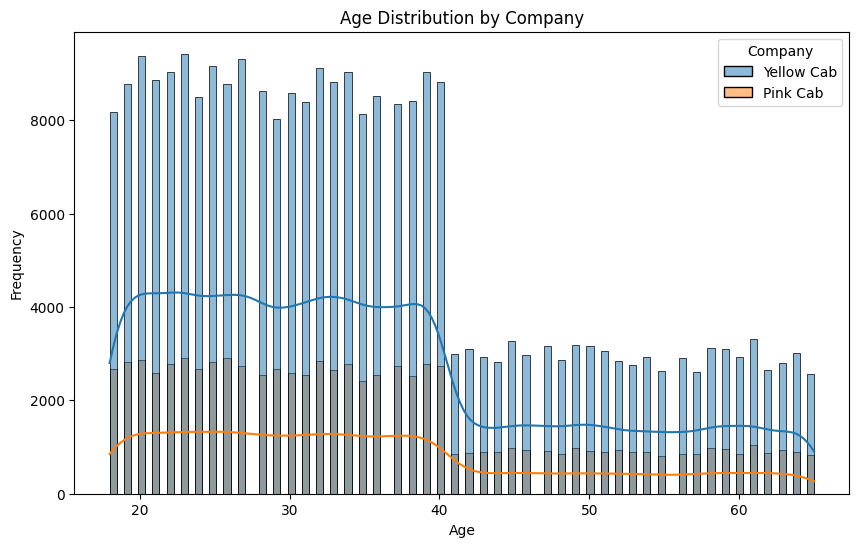

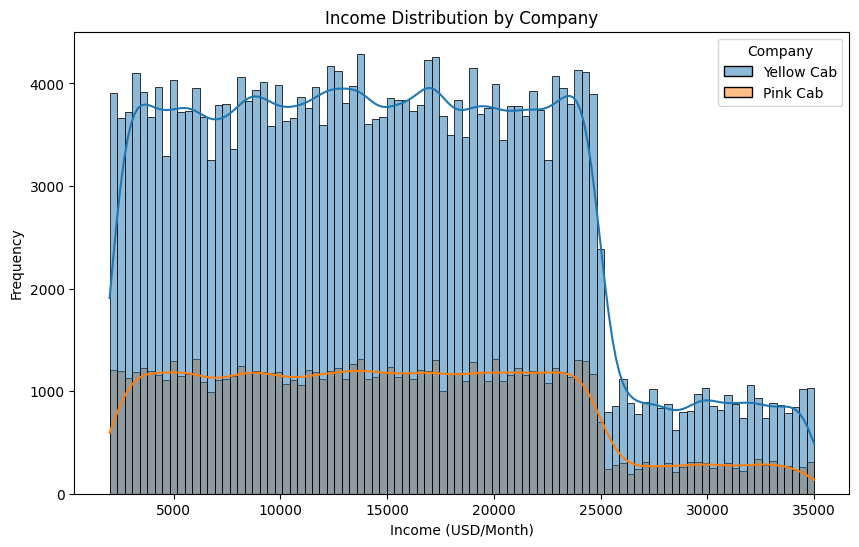

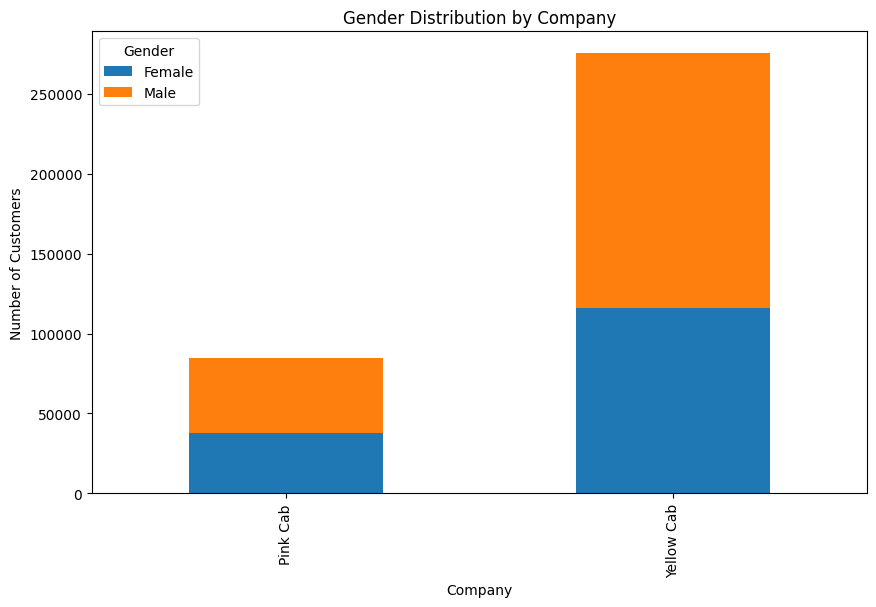

In [34]:
# Age Distribution by Company
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x='Age', hue='Company', kde=True)
plt.title('Age Distribution by Company')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income Distribution by Company
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x='Income (USD/Month)', hue='Company', kde=True)
plt.title('Income Distribution by Company')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution by Company
gender_distribution = final_data.groupby(['Company', 'Gender']).size().unstack()
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.show()


* Yellow Cab appears to attract a younger customer base more effectively than Pink Cab, Predominantly serving younger customers with a higher frequency in the age range of 20-40 years.

* Yellow Cab caters to a broader income range, indicating a wider market reach and potentially better marketing or service offerings that appeal to different income segments.

* Yellow Cab has a larger customer base for both genders, suggesting a broader appeal.

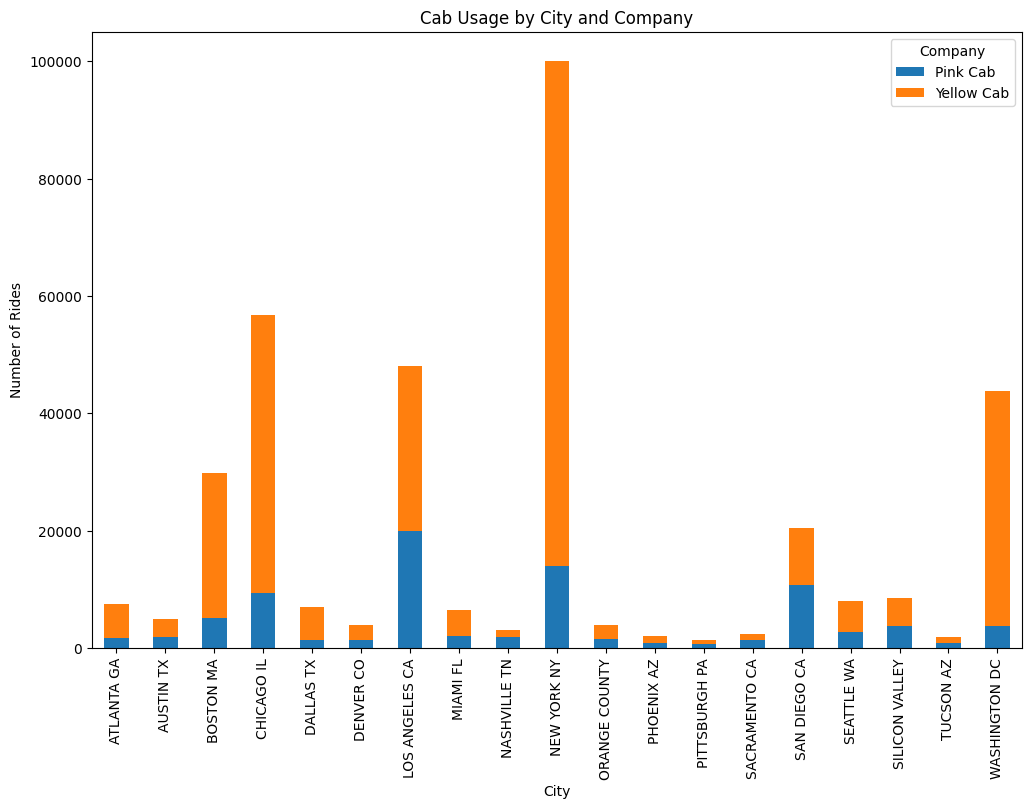

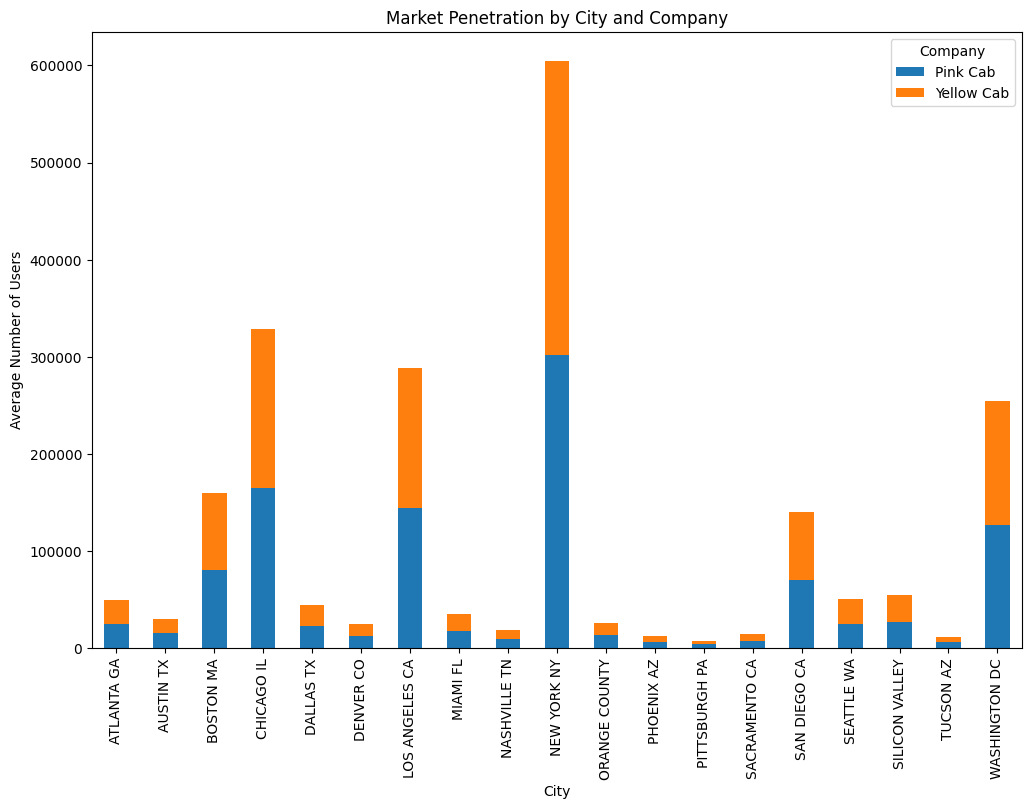

In [35]:
# Cab Usage by City
city_usage = final_data.groupby(['City', 'Company']).size().unstack().fillna(0)
city_usage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cab Usage by City and Company')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.show()

# Market Penetration (Users per City)
market_penetration = final_data.groupby(['City', 'Company'])['Users'].mean().unstack().fillna(0)
market_penetration.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Market Penetration by City and Company')
plt.xlabel('City')
plt.ylabel('Average Number of Users')
plt.show()


Yellow Cab has a stronger market presence in major cities, particularly high-density urban areas like New York, Chicago, and Los Angeles. This indicating better market penetration and possibly better service coverage.


Yellow Cab's higher market penetration suggests a stronger brand presence and customer preference in various locations.

In [36]:
#Compare the number of rides and revenue on holiday vs non-holiday

# Replace 'None' with 'Non-Holiday'
final_data['Holiday'] = final_data['Holiday'].replace('None', 'Non-Holiday')


In [37]:
# Prepare data: Count the number of rides for each date, split by holidays and non-holidays, and company
rides_per_day_company = final_data.groupby(['Date of Travel', 'Company', 'Holiday']).size().reset_index(name='Count')

# Separate holidays and non-holidays for each company
holiday_rides_company = rides_per_day_company[rides_per_day_company['Holiday'] != 'Non-Holiday']
non_holiday_rides_company = rides_per_day_company[rides_per_day_company['Holiday'] == 'Non-Holiday']


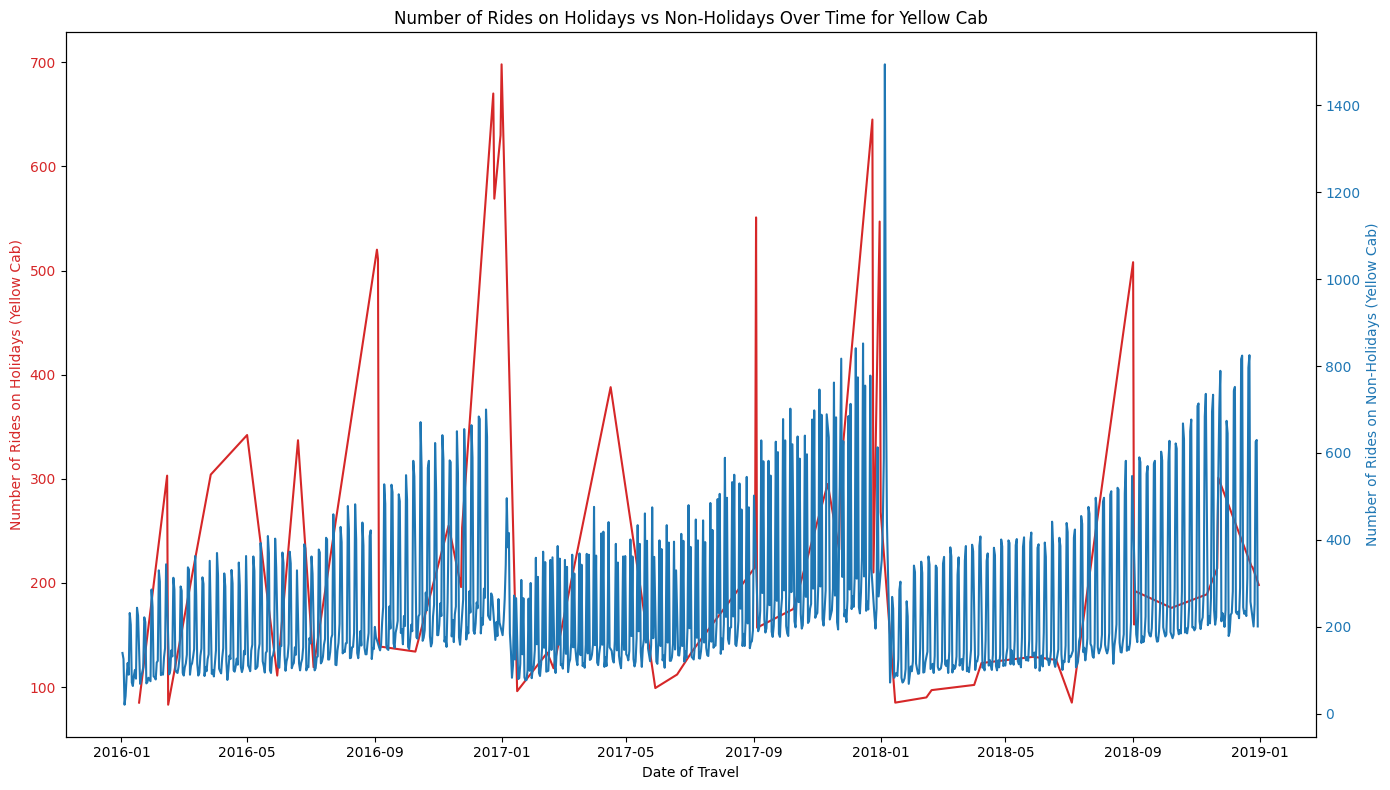

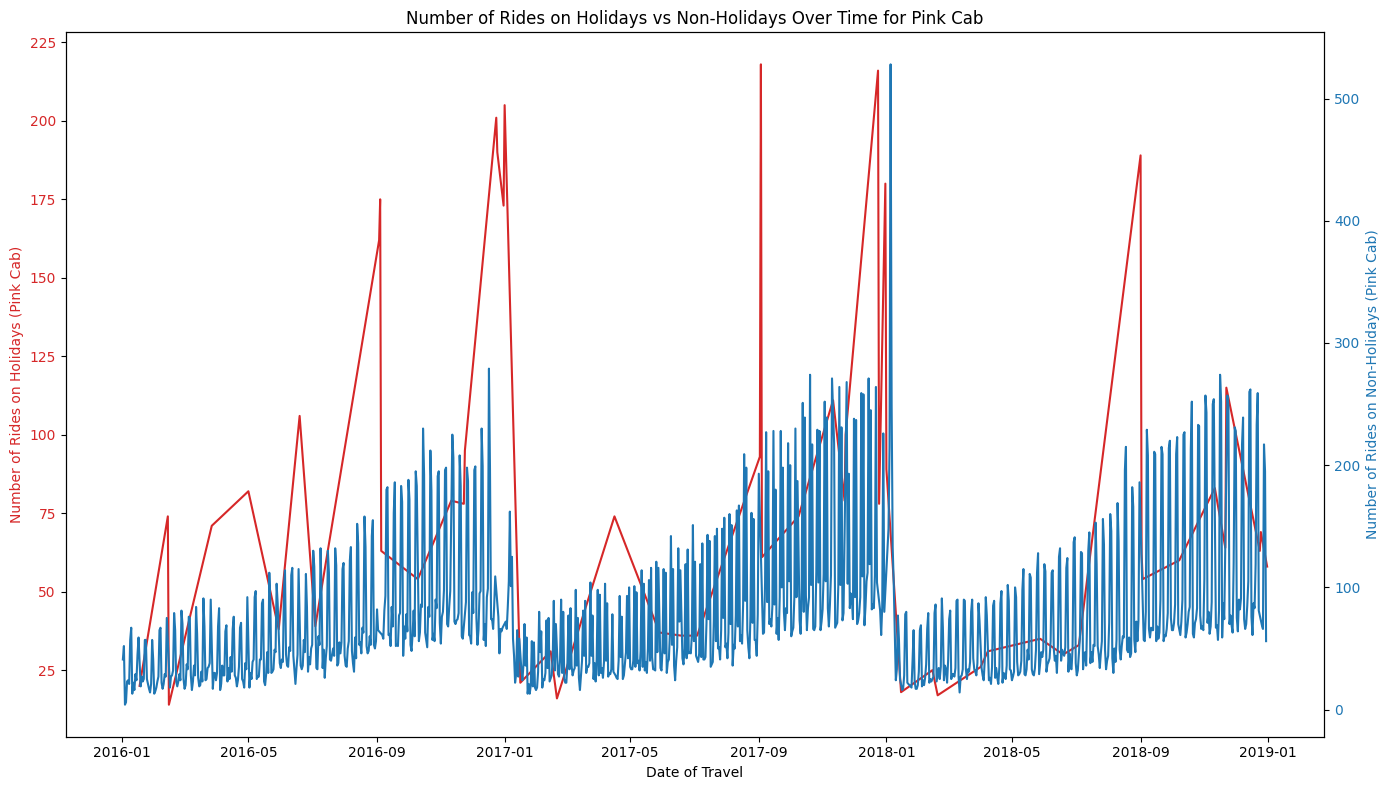

In [38]:
# List of companies
companies = final_data['Company'].unique()

# Plot for each company
for company in companies:
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Data for the current company
    company_holiday_rides = holiday_rides_company[holiday_rides_company['Company'] == company]
    company_non_holiday_rides = non_holiday_rides_company[non_holiday_rides_company['Company'] == company]

    # Plot number of rides on holidays
    color = 'tab:red'
    ax1.set_xlabel('Date of Travel')
    ax1.set_ylabel(f'Number of Rides on Holidays ({company})', color=color)
    ax1.plot(company_holiday_rides['Date of Travel'], company_holiday_rides['Count'], color=color, label='Holidays')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis to plot number of rides on non-holidays
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(f'Number of Rides on Non-Holidays ({company})', color=color)
    ax2.plot(company_non_holiday_rides['Date of Travel'], company_non_holiday_rides['Count'], color=color, label='Non-Holidays')
    ax2.tick_params(axis='y', labelcolor=color)

    # Adding titles and labels
    plt.title(f'Number of Rides on Holidays vs Non-Holidays Over Time for {company}')
    fig.tight_layout()
    plt.show()


Both companies experience increased ride demand on holidays, but Yellow Cab consistently has higher ride numbers, indicating a stronger ability to capitalize on holiday demand.

In [39]:
#Revenue comparisons on holidays vs non-holidays


# Prepare data: Sum the revenue (Price Charged) for each date, split by holidays and non-holidays, and company
revenue_per_day_company = final_data.groupby(['Date of Travel', 'Company', 'Holiday'])['Price Charged'].sum().reset_index(name='Total Revenue')

# Separate holidays and non-holidays for each company
holiday_revenue_company = revenue_per_day_company[revenue_per_day_company['Holiday'] != 'Non-Holiday']
non_holiday_revenue_company = revenue_per_day_company[revenue_per_day_company['Holiday'] == 'Non-Holiday']


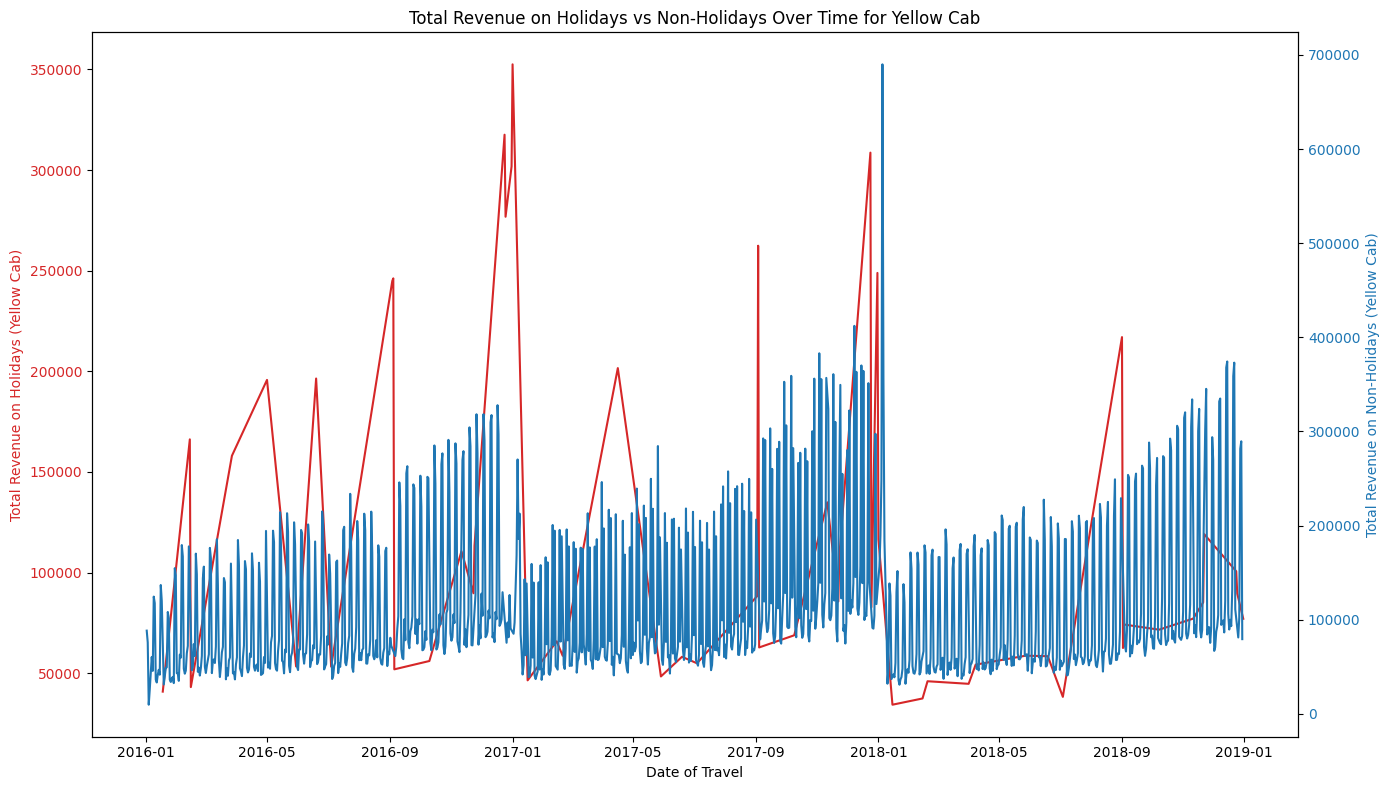

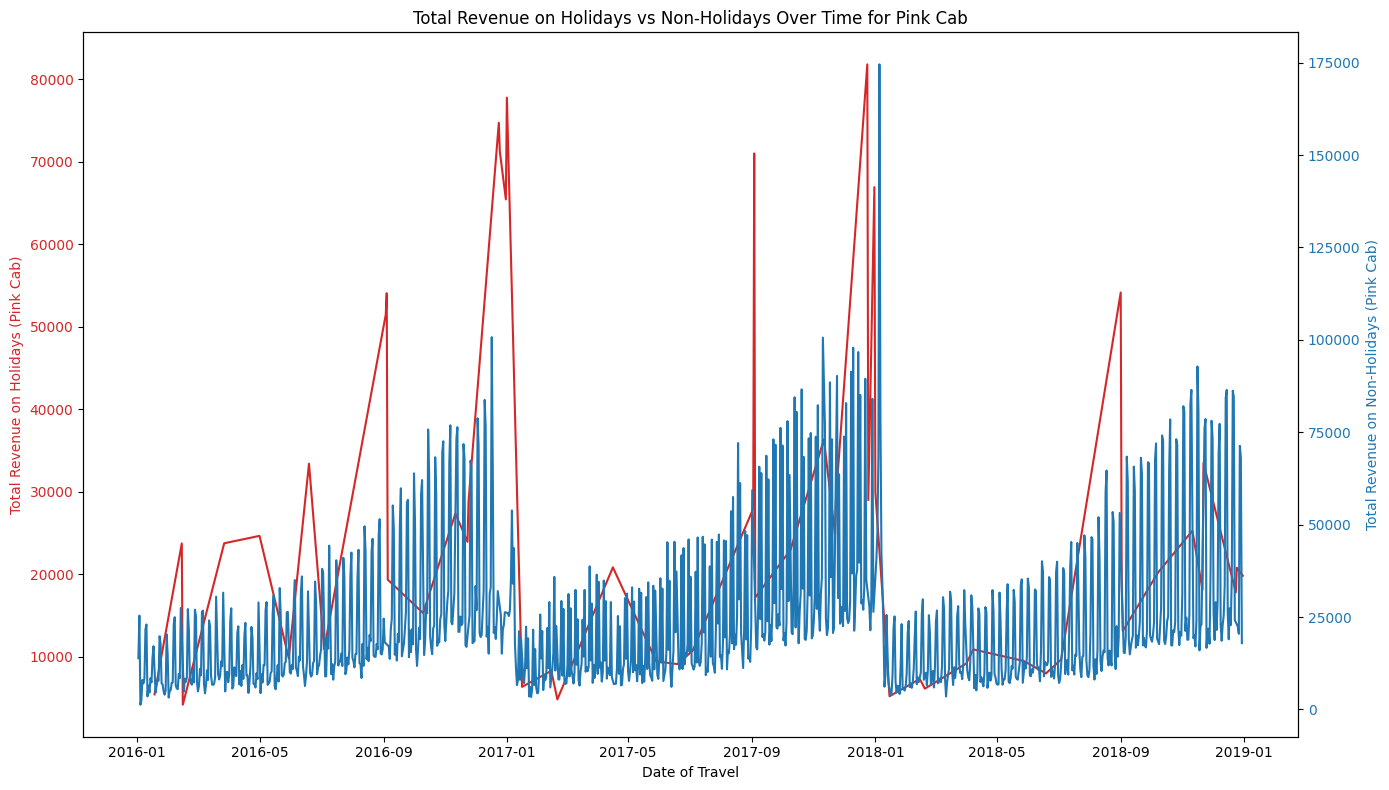

In [40]:

# Plot for each company
for company in companies:
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Data for the current company
    company_holiday_revenue = holiday_revenue_company[holiday_revenue_company['Company'] == company]
    company_non_holiday_revenue = non_holiday_revenue_company[non_holiday_revenue_company['Company'] == company]

    # Plot total revenue on holidays
    color = 'tab:red'
    ax1.set_xlabel('Date of Travel')
    ax1.set_ylabel(f'Total Revenue on Holidays ({company})', color=color)
    ax1.plot(company_holiday_revenue['Date of Travel'], company_holiday_revenue['Total Revenue'], color=color, label='Holidays')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis to plot total revenue on non-holidays
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(f'Total Revenue on Non-Holidays ({company})', color=color)
    ax2.plot(company_non_holiday_revenue['Date of Travel'], company_non_holiday_revenue['Total Revenue'], color=color, label='Non-Holidays')
    ax2.tick_params(axis='y', labelcolor=color)

    # Adding titles and labels
    plt.title(f'Total Revenue on Holidays vs Non-Holidays Over Time for {company}')
    fig.tight_layout()
    plt.show()


From the noticable peaks, both companies generate higher revenue on holidays, but Yellow Cab has a stronger revenue performance overall. This indicates a better ability to capture holiday traffic and maintain strong revenue streams on regular days.

**Lets visualize potential outliers in key variables.** We'll be using boxplots as they provide a summary of the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values, as well as highlight any data points that fall outside 1.5 times the interquartile range (IQR), which are considered potential outliers.

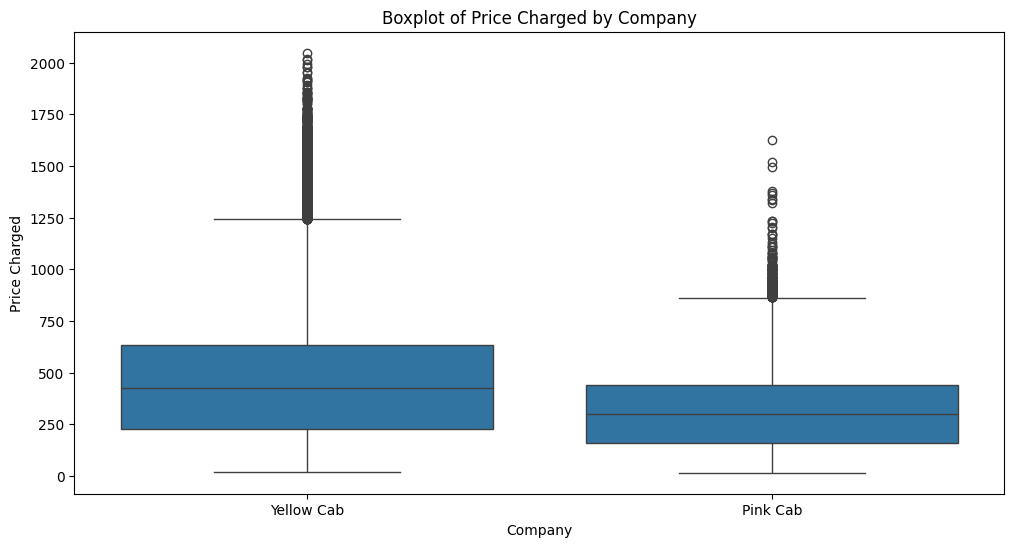

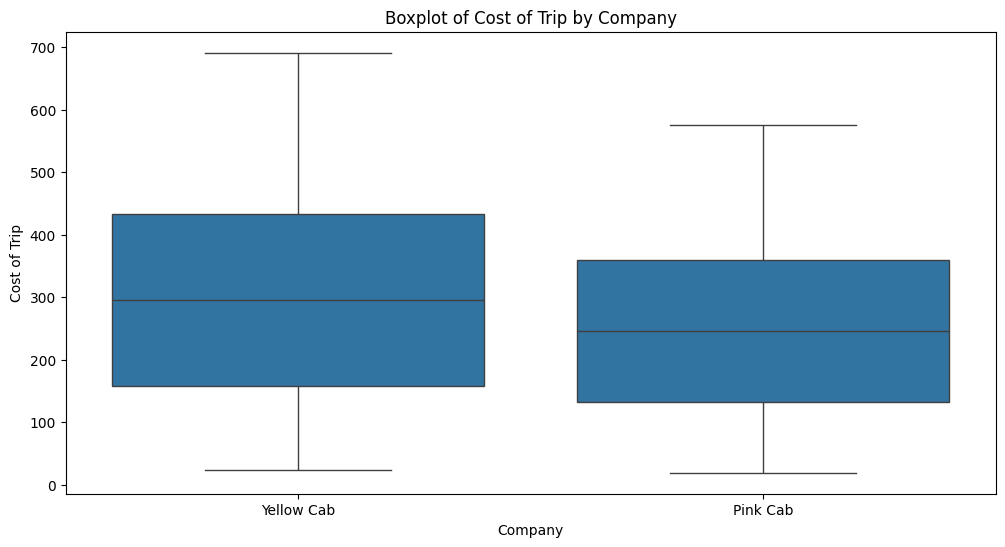

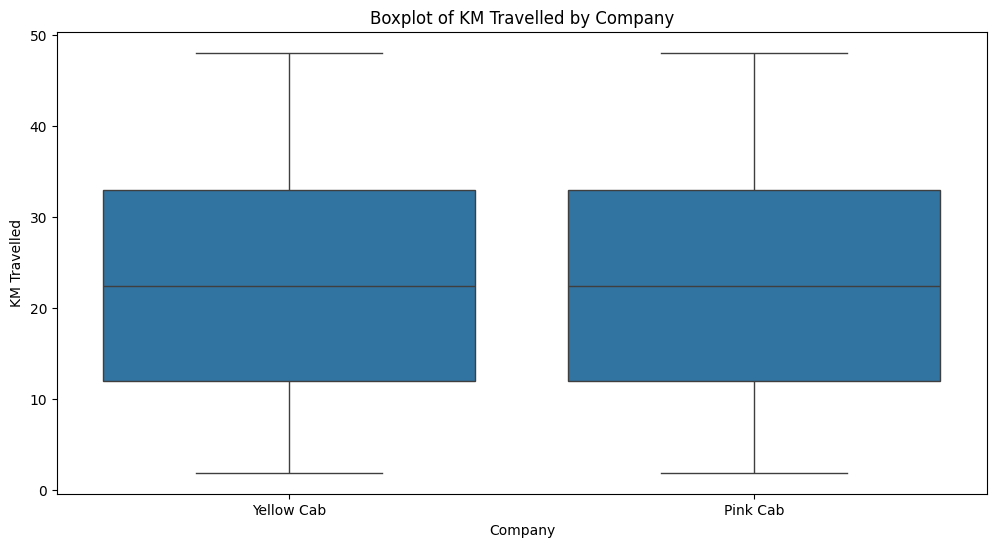

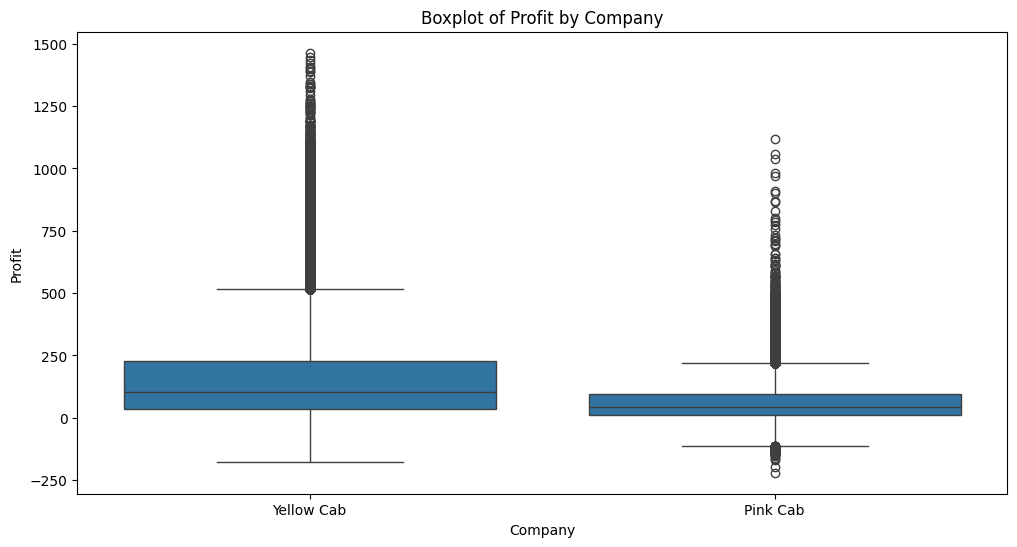

In [41]:
# Visualizing Price Charged
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price Charged', data=final_data)
plt.title('Boxplot of Price Charged by Company')
plt.show()

# Visualizing Cost of Trip
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Cost of Trip', data=final_data)
plt.title('Boxplot of Cost of Trip by Company')
plt.show()

# Visualizing KM Travelled
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='KM Travelled', data=final_data)
plt.title('Boxplot of KM Travelled by Company')
plt.show()

# Visualizing Profit
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Profit', data=final_data)
plt.title('Boxplot of Profit by Company')
plt.show()


The Boxplots reveal that Yellow Cab generally has higher and more variable prices and costs, as well as higher profits indicating more outliers compared to Pink Cab. Pink Cab, while more consistent, shows some instances of negative profits, indicating potential areas for operational improvements. The distribution of kilometers travelled is similar for both companies, suggesting that the primary differences lie in their pricing and cost structures.

### **Hypothesis Testing:**

Based on the insights from the EDA, here are some specific hypotheses that can be derived for further testing and validation:

* Yellow Cab generates significantly higher revenue than Pink Cab on both holidays and non-holidays.
* Yellow Cab has a significantly higher average profit margin than Pink Cab.
* Pink Cab is more cost-efficient (lower cost per km traveled) compared to Yellow Cab.
* Yellow Cab has a higher market penetration in major cities compared to Pink Cab.
*  Yellow Cab serves customers with a broader income range compared to Pink Cab
* The variability in profit per trip for Yellow Cab is significantly higher than that for Pink Cab.
* Pink Cab has a higher incidence of negative profits compared to Yellow Cab.

We'll be using the following statistical test to validate the hypthesis derived:

* T-tests: Used to compare means between two groups (e.g., revenue, profit margin, cost efficiency).
* F-tests: Used to compare variances between two groups (e.g., income range, profit variability).
* Chi-square test: Used to compare the frequency of categorical outcomes between groups (e.g., incidence of negative profits).

In [42]:
#Hypothesis 1: Yellow Cab generates significantly higher revenue than Pink Cab on both holidays and non-holidays

# Separate data by company and holiday status
yellow_cab_holidays = final_data[(final_data['Company'] == 'Yellow Cab') & (final_data['Holiday'] != 'Non-Holiday')]
pink_cab_holidays = final_data[(final_data['Company'] == 'Pink Cab') & (final_data['Holiday'] != 'Non-Holiday')]
yellow_cab_non_holidays = final_data[(final_data['Company'] == 'Yellow Cab') & (final_data['Holiday'] == 'Non-Holiday')]
pink_cab_non_holidays = final_data[(final_data['Company'] == 'Pink Cab') & (final_data['Holiday'] == 'Non-Holiday')]

# T-test for holidays
t_stat_holidays, p_value_holidays = stats.ttest_ind(yellow_cab_holidays['Price Charged'], pink_cab_holidays['Price Charged'])

# T-test for non-holidays
t_stat_non_holidays, p_value_non_holidays = stats.ttest_ind(yellow_cab_non_holidays['Price Charged'], pink_cab_non_holidays['Price Charged'])

print("T-test for holidays: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat_holidays, p_value_holidays))
print("T-test for non-holidays: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat_non_holidays, p_value_non_holidays))

T-test for holidays: t-statistic = 30.35, p-value = 0.0000
T-test for non-holidays: t-statistic = 137.23, p-value = 0.0000


Both p-values are less than 0.05, indicating that the results are statistically significant. The high t-statistic values for both holidays and non-holidays suggest a large difference between the means of Yellow Cab and Pink Cab revenues.

In conclusion, Yellow Cab generates significantly higher revenue than Pink Cab on both holidays and non-holidays. This finding supports the hypothesis that Yellow Cab has a better revenue performance overall compared to Pink Cab, regardless of the day being a holiday or not.

In [43]:
#Hypothesis 2: Yellow Cab has a significantly higher average profit margin than Pink Cab

# Separate data by company
yellow_cab_profit_margin = final_data[final_data['Company'] == 'Yellow Cab']['Profit Margin']
pink_cab_profit_margin = final_data[final_data['Company'] == 'Pink Cab']['Profit Margin']

# T-test for profit margin
t_stat_profit_margin, p_value_profit_margin = stats.ttest_ind(yellow_cab_profit_margin, pink_cab_profit_margin)

print("T-test for profit margin: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat_profit_margin, p_value_profit_margin))


T-test for profit margin: t-statistic = 183.09, p-value = 0.0000


The p-value is less than 0.05, indicating that the result is statistically significant, while the very high t-statistic value suggests a large difference between the average profit margins of Yellow Cab and Pink Cab.

Overall, Yellow Cab has a significantly higher average profit margin than Pink Cab. This confirms that Yellow Cab is more profitable on a per-trip basis.

In [44]:
#Hypothesis 3: Pink Cab is more cost-efficient (lower cost per km traveled) compared to Yellow Cab

# Calculate cost efficiency
final_data['Cost per KM'] = final_data['Cost of Trip'] / final_data['KM Travelled']

# Separate data by company
yellow_cab_cost_per_km = final_data[final_data['Company'] == 'Yellow Cab']['Cost per KM']
pink_cab_cost_per_km = final_data[final_data['Company'] == 'Pink Cab']['Cost per KM']

# T-test for cost efficiency
t_stat_cost_per_km, p_value_cost_per_km = stats.ttest_ind(yellow_cab_cost_per_km, pink_cab_cost_per_km)

print("T-test for cost per KM: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat_cost_per_km, p_value_cost_per_km))


T-test for cost per KM: t-statistic = 800.28, p-value = 0.0000


The p-value is less than 0.05, which indicates that the result is statistically significant. The extremely high t-statistic value suggests a large difference between the cost per kilometer of Pink Cab and Yellow Cab. In conclusion, Pink Cab is significantly more cost-efficient compared to Yellow Cab as it has a lower cost per kilometer traveled.

In [45]:
#Hypothesis 4: Yellow Cab has a higher market penetration in major cities compared to Pink Cab

# Average number of users per city
market_penetration = final_data.groupby(['City', 'Company'])['Customer ID'].nunique().reset_index()

# Separate data by company
yellow_cab_market_penetration = market_penetration[market_penetration['Company'] == 'Yellow Cab']['Customer ID']
pink_cab_market_penetration = market_penetration[market_penetration['Company'] == 'Pink Cab']['Customer ID']

# T-test for market penetration
t_stat_market_penetration, p_value_market_penetration = stats.ttest_ind(yellow_cab_market_penetration, pink_cab_market_penetration)

print("T-test for market penetration: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat_market_penetration, p_value_market_penetration))


T-test for market penetration: t-statistic = 1.46, p-value = 0.1520


The p-value is greater than 0.05, which indicates that the result is not statistically significant. The relatively low t-statistic value suggests that there is no substantial difference between the market penetrations of Yellow Cab and Pink Cab. Conclusion: There is no significant difference in market penetration between Yellow Cab and Pink Cab in major cities.

In [46]:
#Hypothesis 5: Yellow Cab serves customers with a broader income range compared to Pink Cab
# Separate data by company
yellow_cab_income = final_data[final_data['Company'] == 'Yellow Cab']['Income (USD/Month)']
pink_cab_income = final_data[final_data['Company'] == 'Pink Cab']['Income (USD/Month)']

# F-test for income variance
f_stat_income, p_value_income = stats.levene(yellow_cab_income, pink_cab_income)

print("F-test for income variance: f-statistic = {:.2f}, p-value = {:.4f}".format(f_stat_income, p_value_income))


F-test for income variance: f-statistic = 3.04, p-value = 0.0811


The p-value is greater than 0.05, indicating that the result is not statistically significant. The f-statistic value suggests some difference, but it is not enough to be considered significant. Conclusion: There is no significant difference in the income range of customers served by Yellow Cab compared to Pink Cab.

In [47]:
#Hypothesis 6: The variability in profit per trip for Yellow Cab is significantly higher than that for Pink Cab
# Separate data by company
yellow_cab_profit = final_data[final_data['Company'] == 'Yellow Cab']['Profit']
pink_cab_profit = final_data[final_data['Company'] == 'Pink Cab']['Profit']

# F-test for profit variance
f_stat_profit, p_value_profit = stats.levene(yellow_cab_profit, pink_cab_profit)

print("F-test for profit variance: f-statistic = {:.2f}, p-value = {:.4f}".format(f_stat_profit, p_value_profit))

F-test for profit variance: f-statistic = 19875.12, p-value = 0.0000


The p-value is less than 0.05, which indicates that the result is statistically significant. The extremely high f-statistic value suggests a substantial difference in the variances of profit per trip between the two companies. In conclusion, the variability in profit per trip for Yellow Cab is significantly higher than that for Pink Cab.

In [48]:
#Hypothesis 7: Pink Cab has a higher incidence of negative profits compared to Yellow Cab

# Calculate negative profit incidence
final_data['Negative Profit'] = final_data['Profit'] < 0

# Contingency table for chi-square test
contingency_table = pd.crosstab(final_data['Company'], final_data['Negative Profit'])

# Chi-square test for negative profit incidence
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test for negative profit incidence: chi2-statistic = {:.2f}, p-value = {:.4f}".format(chi2_stat, p_value_chi2))


Chi-square test for negative profit incidence: chi2-statistic = 6709.73, p-value = 0.0000


The p-value is less than 0.05, which indicates that the result is statistically significant. The very high chi2-statistic value suggests a substantial difference in the incidence of negative profits between the two companies. In conclusion, Pink Cab has a significantly higher incidence of negative profits compared to Yellow Cab.

## Conclusions and Recommendations

**Summary of Findings**

Based on the exploratory data analysis (EDA) and hypothesis testing, the following key findings have been identified:

**Revenue and Profitability:**

Yellow Cab generates significantly higher revenue than Pink Cab on both holidays and non-holidays.
Yellow Cab has a significantly higher average profit margin compared to Pink Cab.
The variability in profit per trip for Yellow Cab is significantly higher than that for Pink Cab.
Cost Efficiency:

Pink Cab is more cost-efficient, with a lower cost per kilometer traveled compared to Yellow Cab.

**Market Penetration:**

There is no significant difference in market penetration between Yellow Cab and Pink Cab in major cities.

**Customer Demographics:**

Both companies serve a similar range of customer incomes.
Yellow Cab serves a slightly broader income range compared to Pink Cab.

**Profit Variability:**

Yellow Cab shows higher variability in profit per trip, indicating more significant fluctuations in profitability.

**Negative Profits:**

Pink Cab has a higher incidence of negative profits, indicating potential operational inefficiencies or pricing challenges.


---



### **Recommendations**
**Invest in Yellow Cab:**

Consider investing in Yellow Cab due to its strong market performance and profitability. The company demonstrates higher revenue generation and profitability, capturing market demand effectively, especially during holidays, leading to increased revenue. Additionally, the higher average profit margin indicates more efficient operations or pricing strategies. XYZ should consider investing in Yellow Cab to leverage its strong market performance and profitability.

**Operational Improvements for Pink Cab:**

Although Pink Cab is more cost-efficient, it experiences higher incidences of negative profits and lower overall profitability. To improve its financial performance, Pink Cab should conduct a detailed analysis of trips that result in negative profits to identify and rectify operational inefficiencies. Consider revising pricing strategies to reduce the occurrence of unprofitable trips.

**Enhance Market Penetration Strategies:**

Both companies have similar market penetration, indicating potential for growth in major cities. They should explore marketing and partnership opportunities to expand their user base. Targeted campaigns and promotions could help attract more customers.

**Maintain Cost Efficiency for Pink Cab:**

Pink Cab's lower cost per kilometer is a competitive advantage that can be leveraged to improve profitability. The company should continue to optimize operational costs while addressing issues leading to negative profits to achieve better financial health.

**Monitor Profit Variability for Yellow Cab:**

Yellow Cab's higher profitability is accompanied by significant profit fluctuations, indicating potential volatility. To stabilize profitability, the company should closely monitor profit variability and consider adjusting pricing strategies or implementing cost control measures during periods of high variability.

**Explore Pricing Strategies:**

Both companies should onsider revisiting pricing strategies to optimize revenue and profit margins. Conduct market research to understand price sensitivity and implement dynamic pricing strategies for peak demand periods like holidays.

## **Conclusion**

The analysis clearly indicates that Yellow Cab is a stronger performer in terms of revenue and profitability, making it a more attractive investment opportunity for XYZ. However, Pink Cab's cost efficiency and potential for operational improvements also present opportunities for growth. By addressing the identified issues and leveraging their strengths, both companies can enhance their market position and financial performance.